In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Visuals setup

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20
FIG_WIDTH, FIG_HEIGHT = 10, 6

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("axes", titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["figure.figsize"] = FIG_WIDTH, FIG_HEIGHT
# plt.rcParams["hatch.linewidth"] = 0.2

plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

# display all columns
pd.set_option("display.max_columns", None)

In [3]:
def plot_parity_line(ax=None):
    if ax is None:
        ax = plt.gca()

    xlims = ax.get_xlim()
    ylims = ax.get_ylim()
    lims = [np.min([xlims[0], ylims[0]]), np.max([xlims[1], ylims[1]])]

    ax.plot(lims, lims, "k--", linewidth=1)

In [4]:
def create_correlation_heatmap(df_corr, sort_by= "class_label"):
    features_ordered = df_corr.sort_values(
       sort_by, ascending=False
    ).index.tolist()

    # maximum value of heatmap
    vmax = df_corr.mask(np.eye(df_corr.shape[0], dtype=bool)).abs().max().max() * 100.0

    # setting up mask
    mask = np.triu(df_corr)

    # using the upper triangle matrix as mask
    sns.heatmap(
        df_corr.loc[features_ordered, features_ordered] * 100.0,
        annot=True,
        mask=mask,
        fmt="0.1f",
        vmin=-vmax,
        vmax=vmax,
        cmap="seismic",
    )
    
    return features_ordered

         x1        x2        x3         y
0  0.049671 -0.425275  0.084500 -0.471235
1 -0.013826 -0.227676  0.014506 -0.259298
2  0.064769 -0.353398 -0.028883 -0.175131
3  0.152303  0.229596  0.210261  0.106314
4 -0.023415  0.814610 -0.172424  0.363071


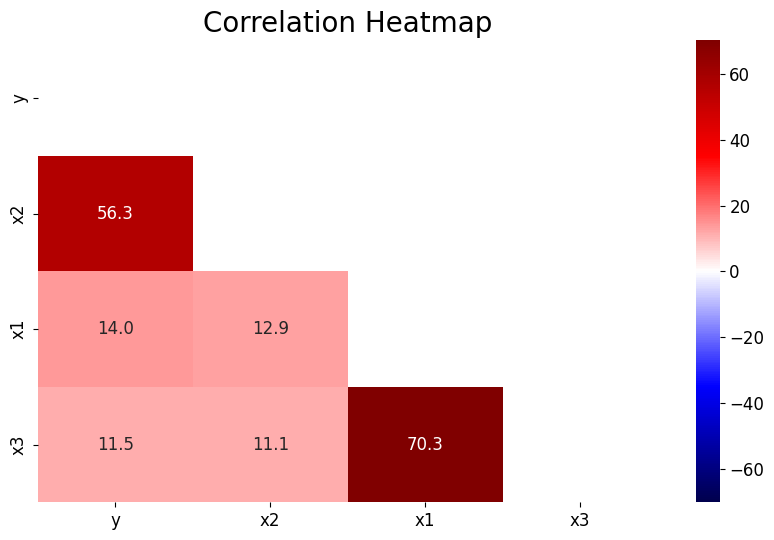

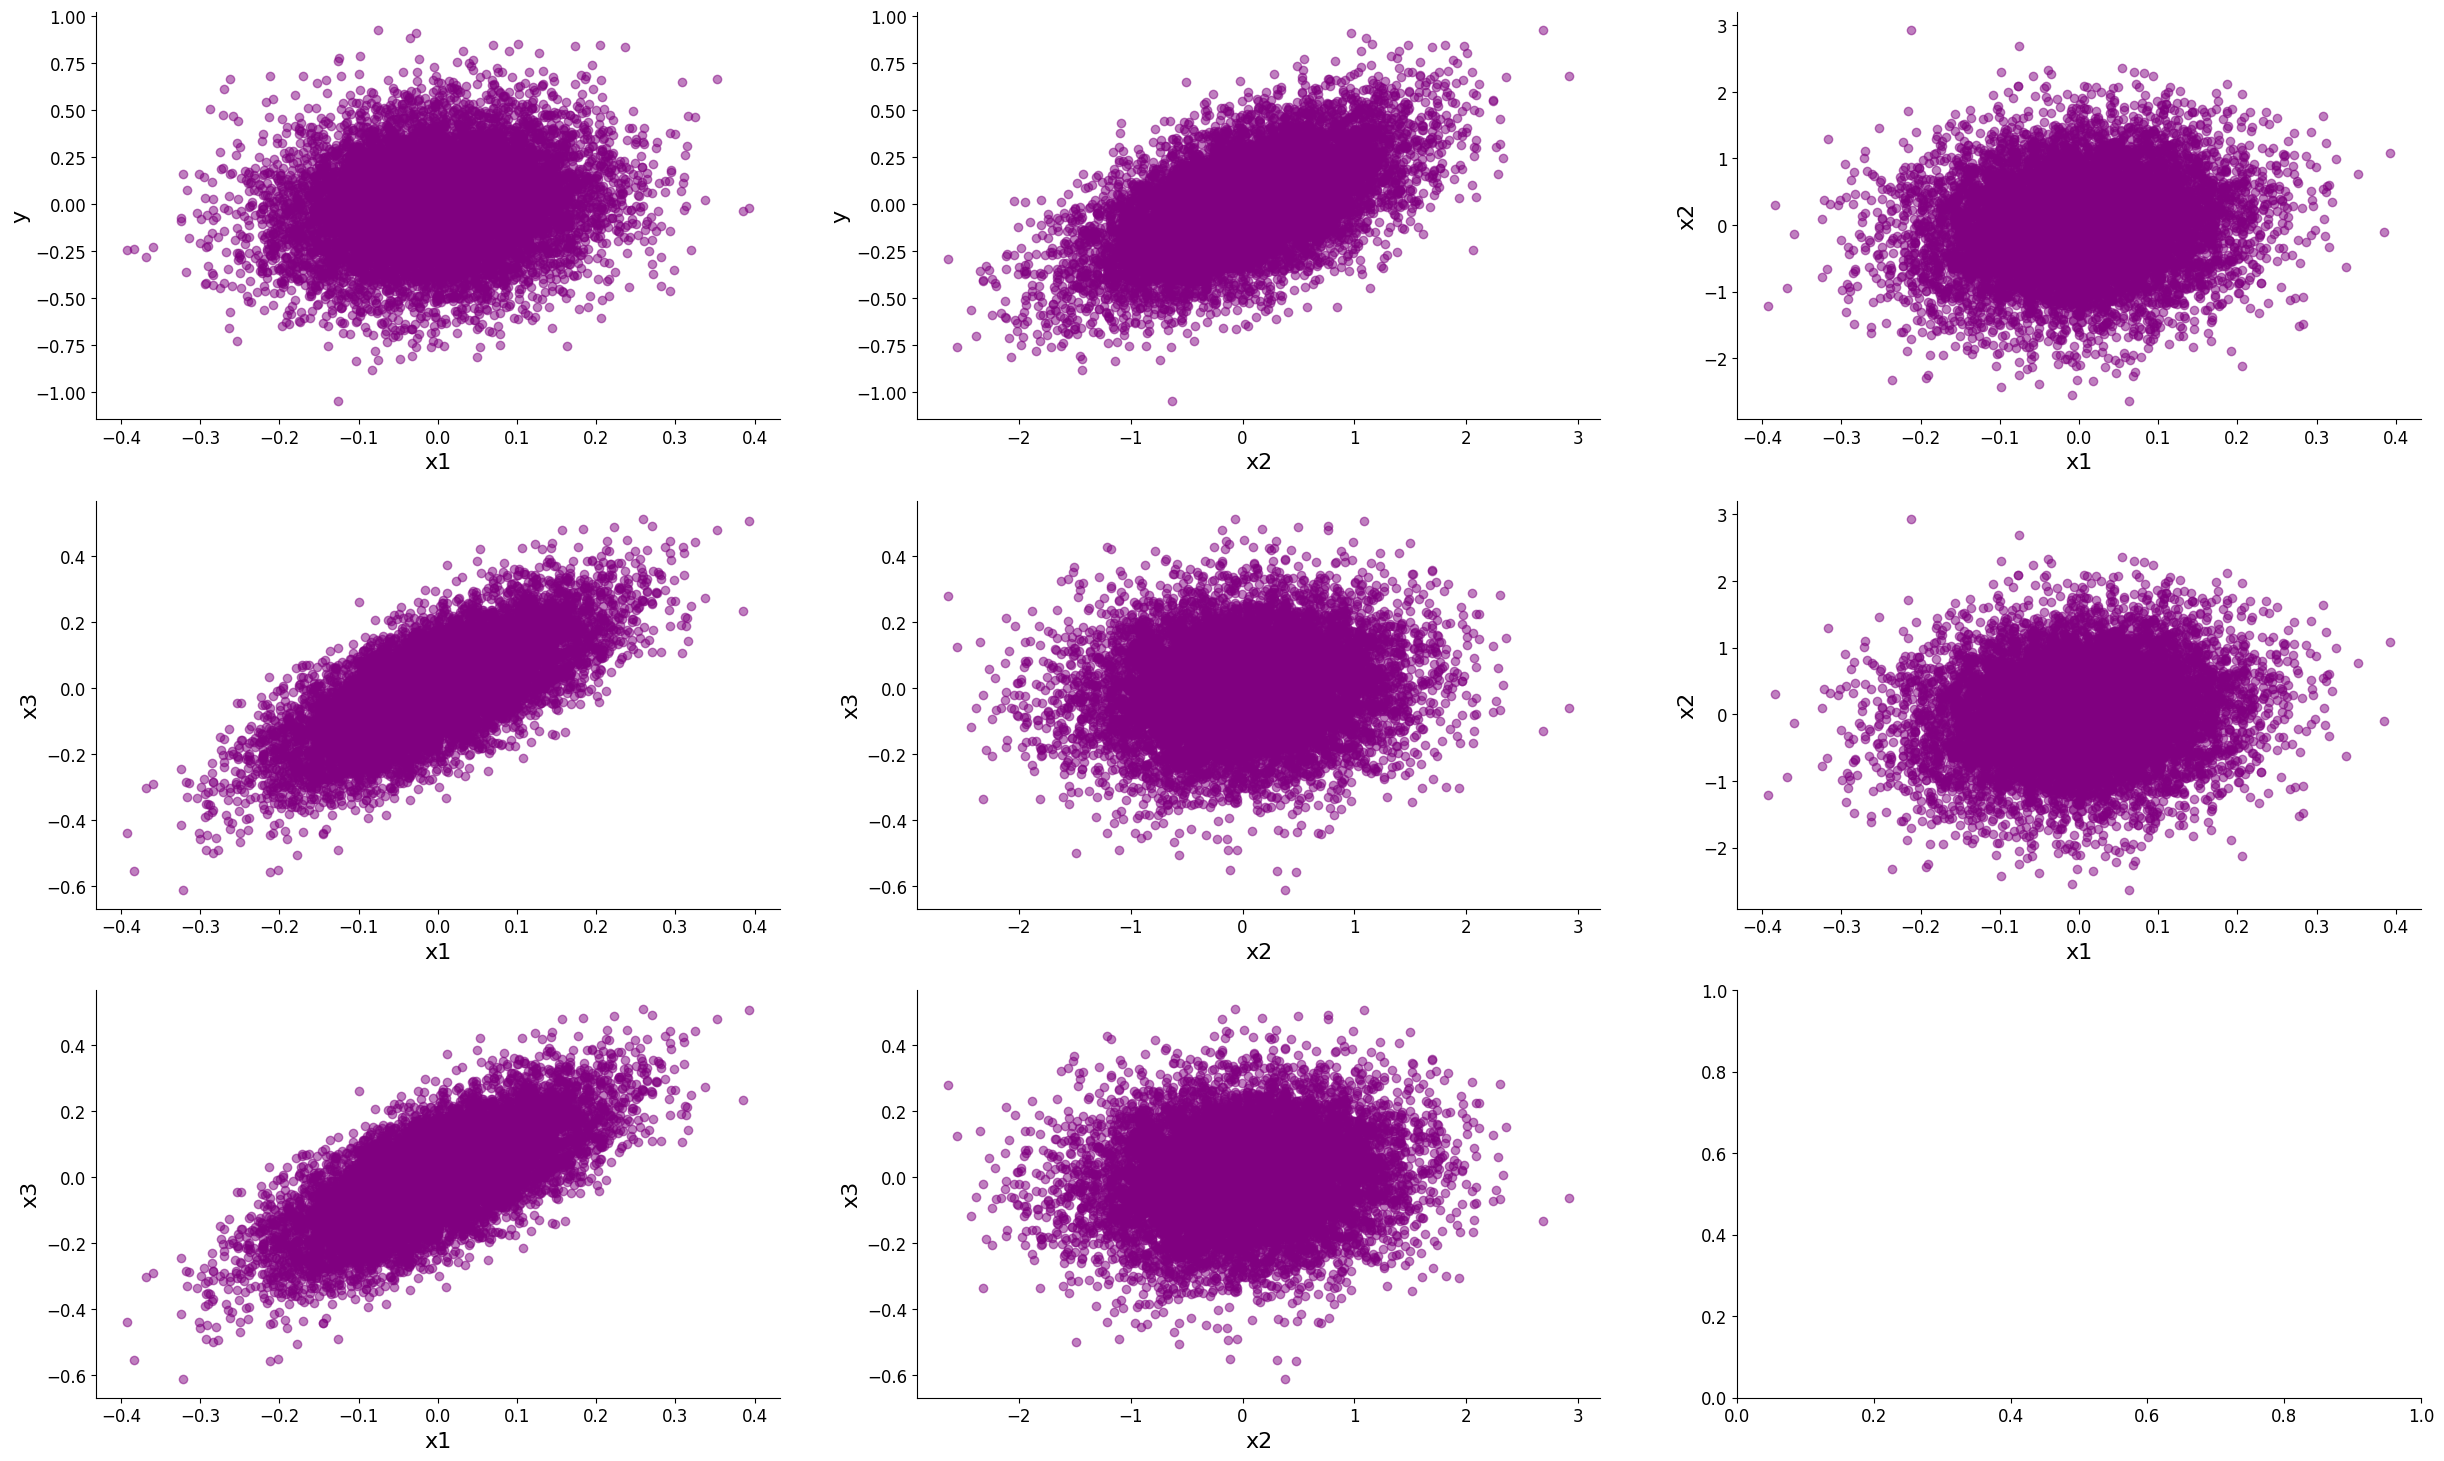

In [26]:
# Set the random seed for reproducibility
np.random.seed(42)

# Define the number of samples
n_samples = 10000

# Define the noise strengths
noise_x1 = 0.1

noise_x2 =  noise_x1 * 7. 
noise_x3 =  noise_x1 #* 7.
noise_y = noise_x1 * 2. #0.3

# Generate x1
x1 = np.random.normal(loc=0, scale=noise_x1, size=n_samples)
x2 = x1 + np.random.normal(loc=0, scale=noise_x2, size=n_samples)
x3 = x1 + np.random.normal(loc=0, scale=noise_x3, size=n_samples)

# x1->x2->y<-x1
# coeff_1 = 1.
# coeff_2 = 0.05

# x1->x2->y<-x1 (works when x2 has weak impact and x1 even weaker)
# coeff_2 = 0.1
# coeff_1 = coeff_2 * 0.2

# x1->x2->y<-x1 (works when x2 has strong impact and x1 even weaker)
# coeff_2 = 0.2
# coeff_1 = coeff_2 * 0.2


# x1->x2->y<-x1->x3->y (works when x2 has strong impact and x1 the same coefficient)
coeff_2 = 0.2
coeff_1 = coeff_2
coeff_3 = 0.  # not directly impacts y

# # x1->x2->y<-x1->x3->y (works when x2 has strong impact and x1 weaker)
# coeff_2 = 0.3
# coeff_1 = 0. #coeff_2 * 0.5
# coeff_3 = 0.  # not directly impacts y


# Generate y with dependencies on x1, x2, and x3
y = coeff_1 * x1 + coeff_2 * x2  + coeff_3 * x3
y += np.random.normal(loc=0, scale=noise_y, size=n_samples)


# Create a DataFrame with the generated data
df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y': y})
#df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# Display the first few rows of the DataFrame
print(df.head())

df_corr = df.corr(method="spearman")
create_correlation_heatmap(df_corr, sort_by= "y")
plt.title("Correlation Heatmap")

pairs = [["x1", "y"], ["x2", "y"], ["x1", "x2"]]
pairs += [["x1", "x3"], ["x2", "x3"], ["x1", "x2"], ["x1", "x3"], ["x2", "x3"]]

npanels = len(pairs)
ncols = 3
nrows = int(np.ceil(npanels / ncols))

fig, axs = plt.subplots(nrows, ncols, figsize=(FIG_WIDTH * ncols, FIG_HEIGHT * nrows))

for i, pair in enumerate(pairs):
    ax = axs.flat[i]
    ax.scatter(df[pair[0]], df[pair[1]], alpha=0.5, color="purple")
    #plot_parity_line(ax)
    ax.set_xlabel(pair[0])
    ax.set_ylabel(pair[1])

In [30]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(df[['x1', 'x2', 'x3']])

# Create a new DataFrame with the scaled features
df_scaled = pd.DataFrame(scaled_features, columns=['x1', 'x2', 'x3'])

# Add the target variable 'y' to the scaled DataFrame
df_scaled['y'] = df['y']

# Display the first few rows of the scaled DataFrame
print(df_scaled.head())

         x1        x2        x3         y
0  0.497154 -0.614644  0.601425 -0.471235
1 -0.135665 -0.335143  0.111706 -0.259298
2  0.647615 -0.512975 -0.191869 -0.175131
3  1.519979  0.311661  1.481324  0.106314
4 -0.231228  1.139156 -1.196160  0.363071


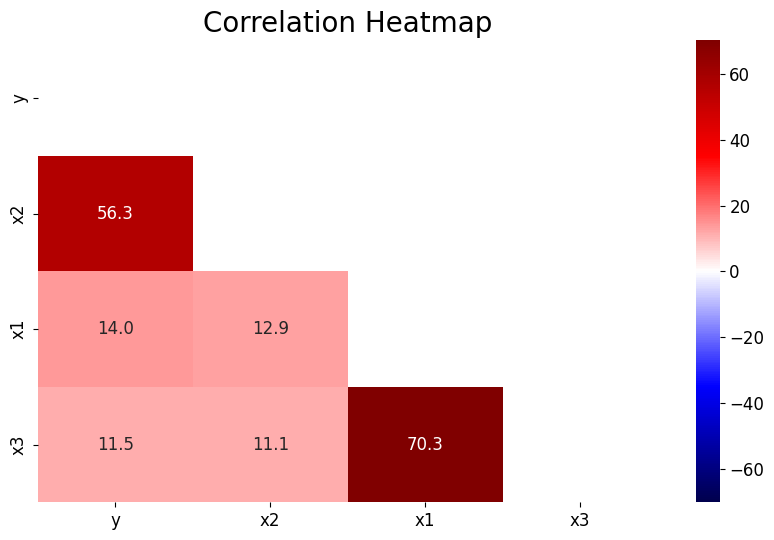

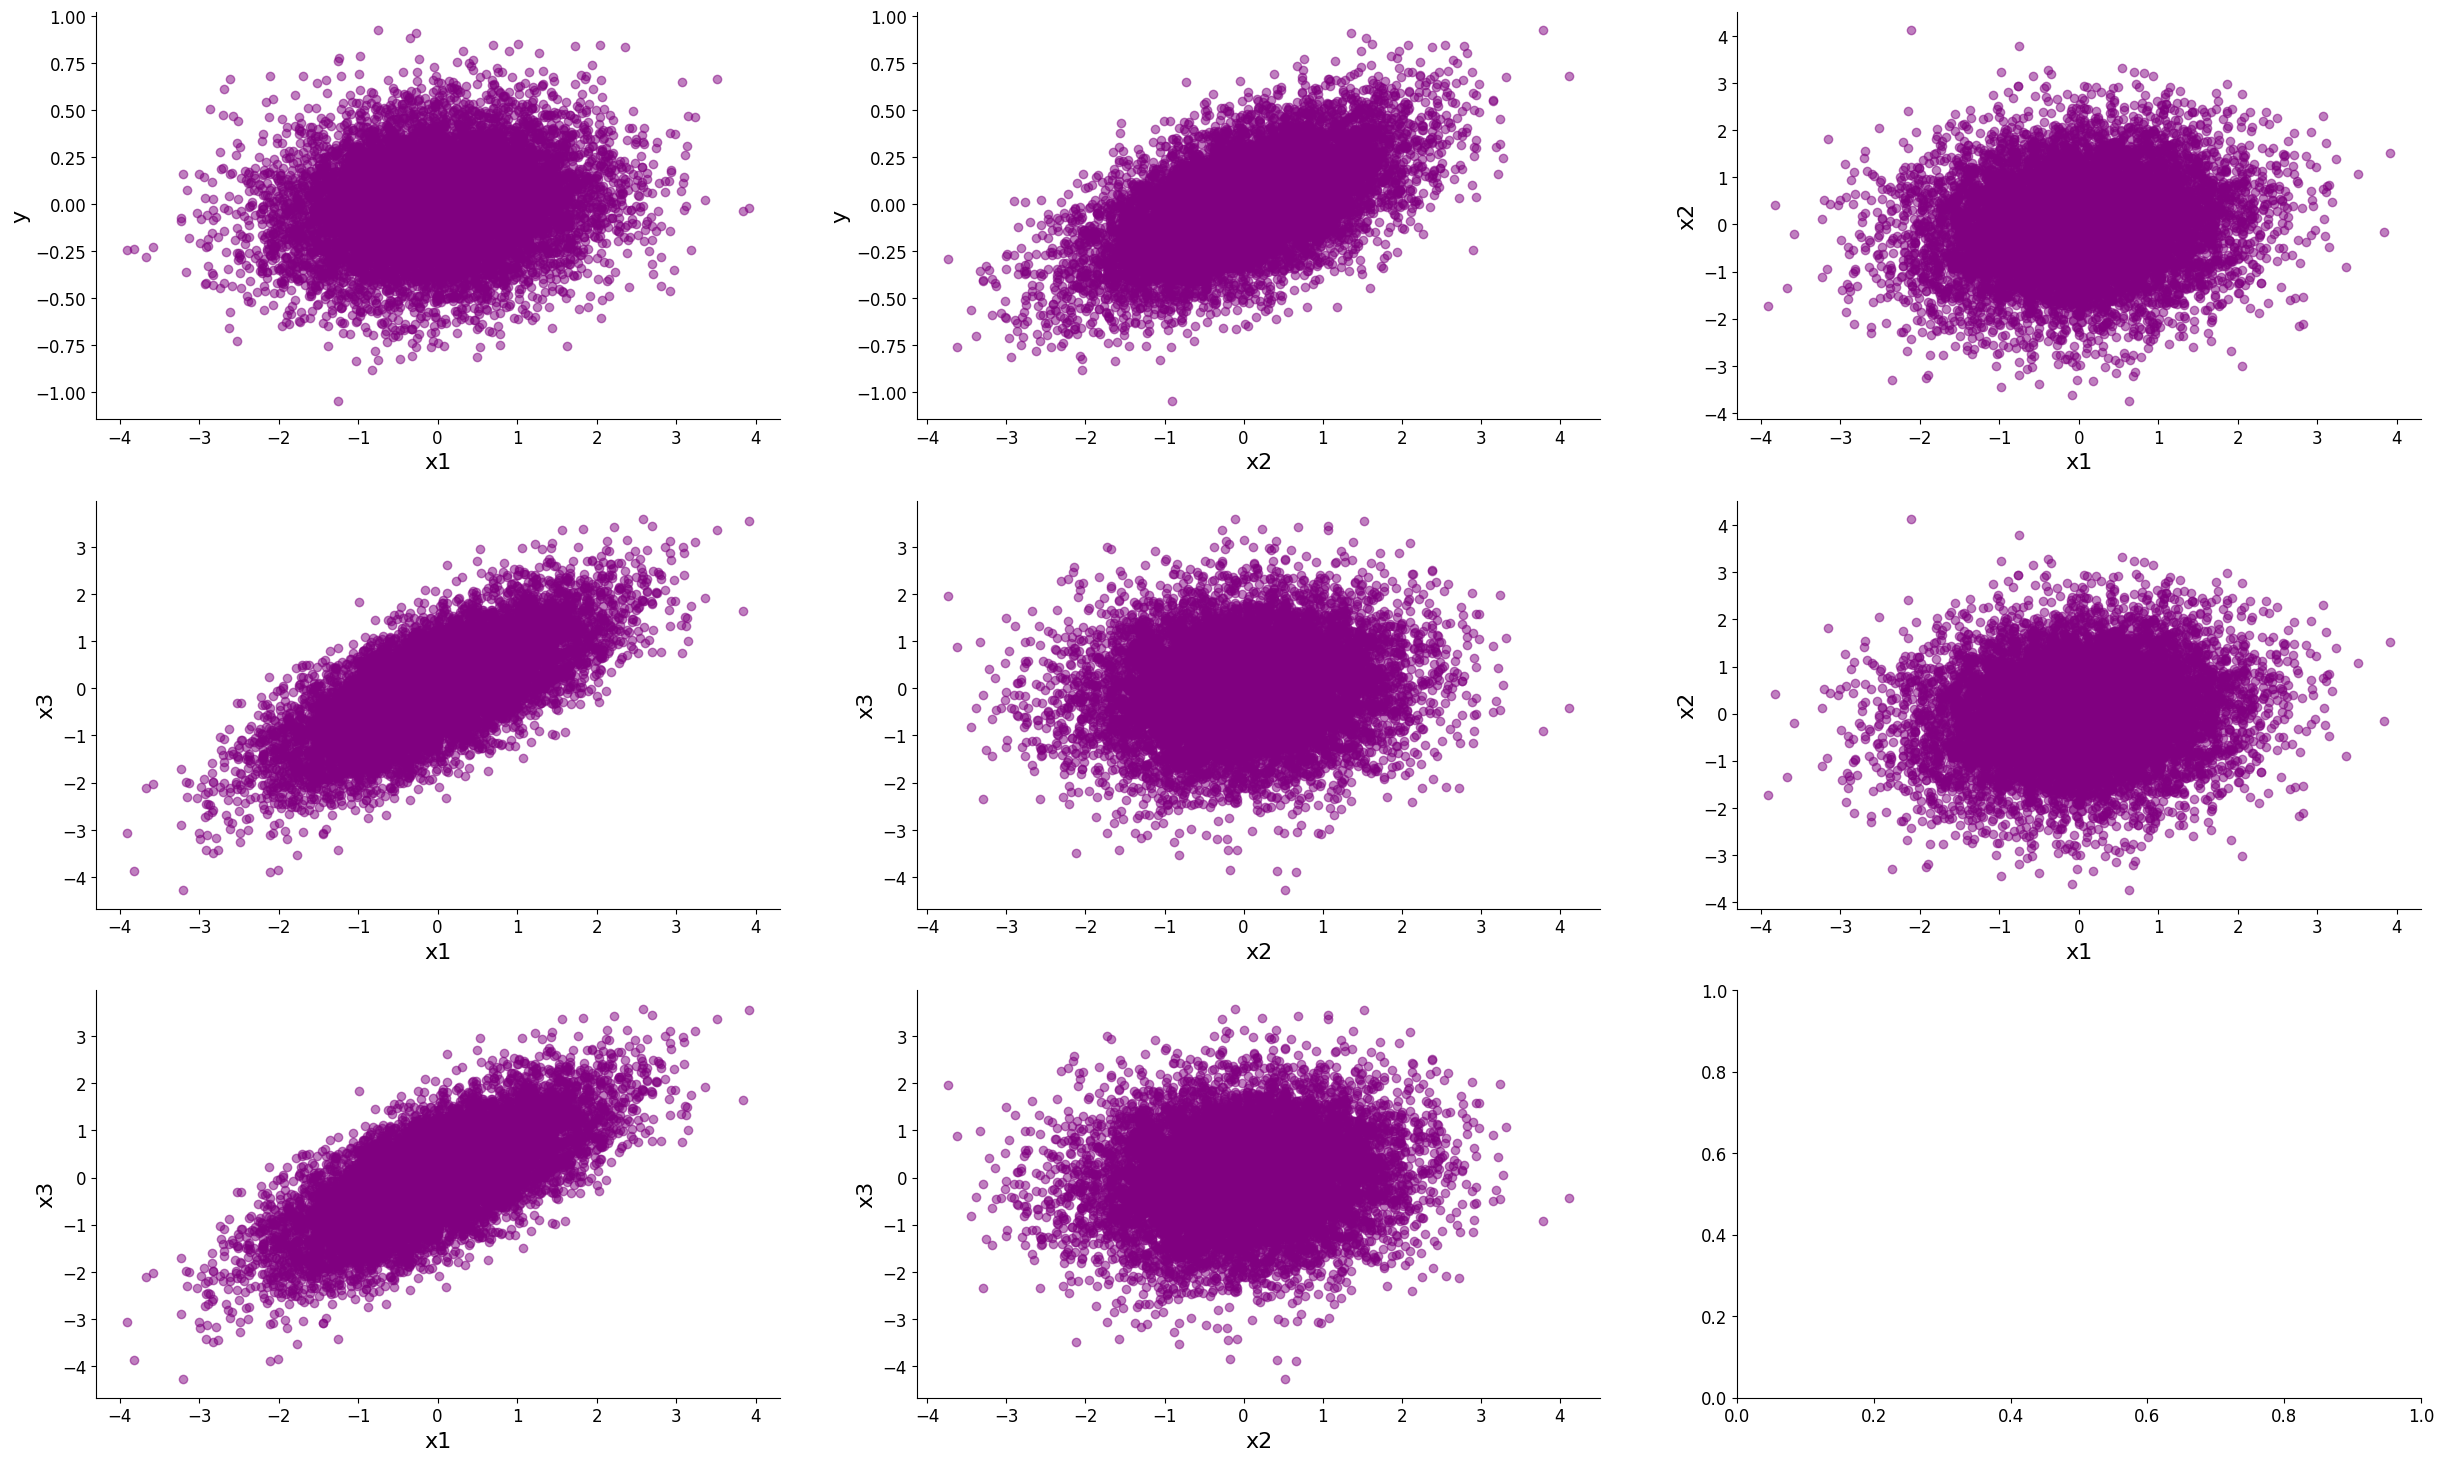

In [32]:
df_corr = df_scaled.corr(method="spearman")
create_correlation_heatmap(df_corr, sort_by= "y")
plt.title("Correlation Heatmap")

pairs = [["x1", "y"], ["x2", "y"], ["x1", "x2"]]
pairs += [["x1", "x3"], ["x2", "x3"], ["x1", "x2"], ["x1", "x3"], ["x2", "x3"]]

npanels = len(pairs)
ncols = 3
nrows = int(np.ceil(npanels / ncols))

fig, axs = plt.subplots(nrows, ncols, figsize=(FIG_WIDTH * ncols, FIG_HEIGHT * nrows))

for i, pair in enumerate(pairs):
    ax = axs.flat[i]
    ax.scatter(df_scaled[pair[0]], df_scaled[pair[1]], alpha=0.5, color="purple")
    #plot_parity_line(ax)
    ax.set_xlabel(pair[0])
    ax.set_ylabel(pair[1])

In [42]:
from sklearn.ensemble import RandomForestRegressor
# import linear regressort
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# import spearmanr

from scipy.stats import spearmanr

# Define the features and target variable
features = ['x1', 'x2', 'x3']
#features = ['x1']
#features = ['x2']
#features = ['x1', 'x2']
#features = ['x2', 'x3']

# X_ = df_scaled[features]
# y_ = df_scaled['y'] #.sample(len(df["y"]), replace=False)

X_ = df[features].copy()
y_ = df['y'].copy() #.sample(len(df["y"]), replace=False)



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=56)

# Create the RandomForestRegressor model
#rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor = LinearRegression()

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Calculate the mean squared error
#mse = mean_squared_error(y_test, y_pred,)
r2_score_ = r2_score(y_test, y_pred)
spearmanr_ = spearmanr(y_test, y_pred)
#print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2_score_ }')
print(f'Spearmanr: {spearmanr_}')

R2 Score: 0.3494086397182369
Spearmanr: SignificanceResult(statistic=0.5563839070959767, pvalue=6.1749082468571e-163)


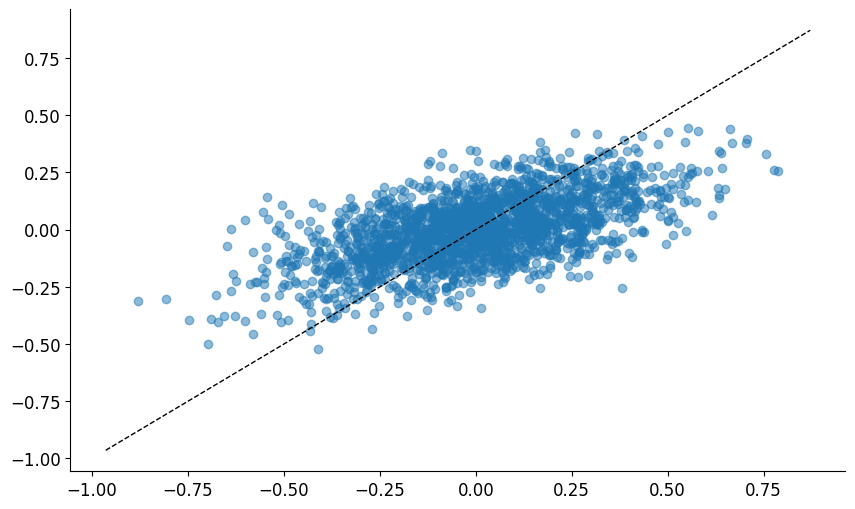

In [43]:
plt.scatter(y_test, y_pred, alpha=0.5)

plot_parity_line()

Text(0.5, 1.0, 'LinearRegression coefficients')

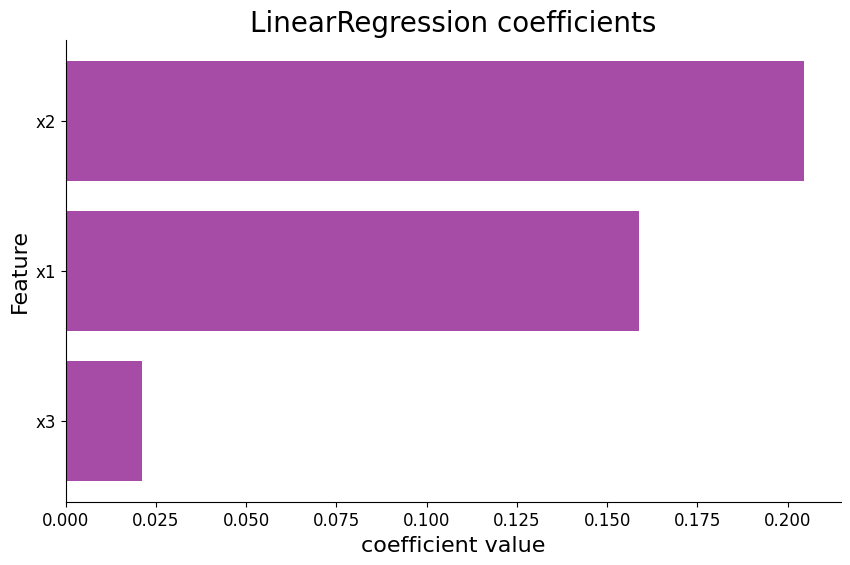

In [44]:
model_name = rf_regressor.__class__.__name__

feature_importances = pd.DataFrame(
            {
                "feature": X_train.columns,
                "importance": rf_regressor.coef_,
            }
        )


feature_importances["importance_abs"] = np.abs(
    feature_importances["importance"]
)
feature_importances = feature_importances.sort_values(
    "importance_abs", ascending=False
)[::-1]


plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plt.barh(
    feature_importances["feature"],
    feature_importances["importance"],
    color="purple",
    alpha=0.7,
)
plt.xlabel("coefficient value")
plt.ylabel("Feature")
plt.title(f"{model_name} coefficients")

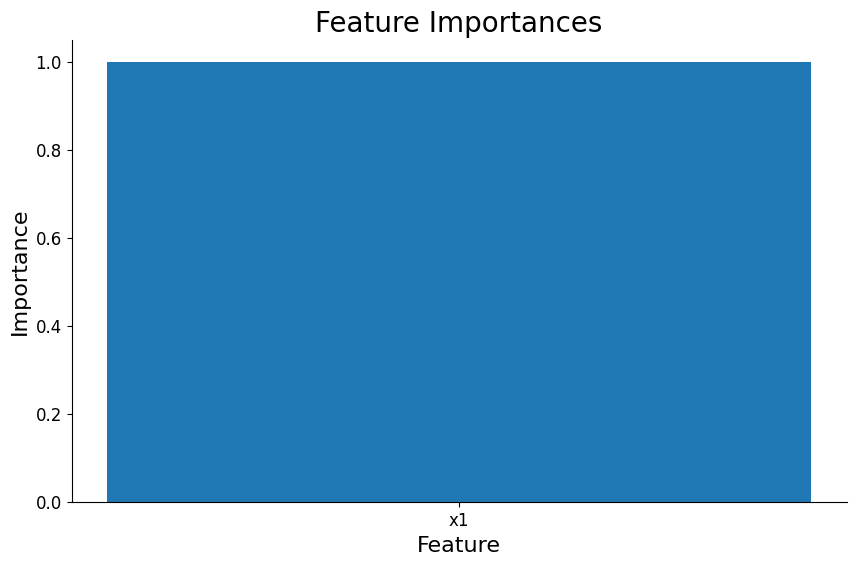

In [14]:
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_.shape[1]), importances[indices], align="center")
plt.xticks(range(X_.shape[1]), [features[i] for i in indices])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

In [45]:
import shap

# Initialize the SHAP explainer
explainer = shap.Explainer(rf_regressor, X_train)

# Calculate SHAP values
shap_values = explainer(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test)

/Users/eyal/.pyenv/versions/3.8.11/envs/scrappy-3.8.11/lib/python3.8/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/eyal/.pyenv/versions/3.8.11/envs/scrappy-3.8.11/lib/python3.8/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-us

AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations